In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# load data

advertising = pd.read_csv('./data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()
advertising.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


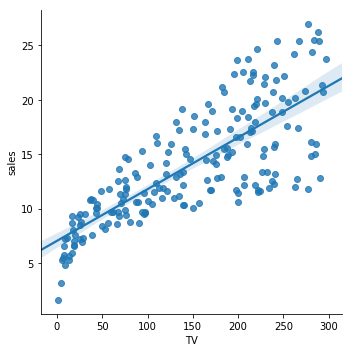

In [3]:
sns.lmplot('TV', 'sales', data = advertising)

In [46]:
tv = advertising.TV
sales = advertising.sales

beta1 = ((tv - tv.mean()) * (sales - sales.mean())).sum() / ((tv - tv.mean()) ** 2).sum()
beta0 = sales.mean() - beta1 * tv.mean()

rss = np.sum((beta0 + beta1 * tv - sales) ** 2) / 1000

print(f'beta1: {beta1}, beta0: {beta0}')
print(f'rss: {rss}')


beta1: 0.04753664043301969, beta0: 7.032593549127705
rss: 2.102530583131352


min rss: 2.102632807238421
min_beta0: 7.020202020202021, min_beta1: 0.04772727272727273


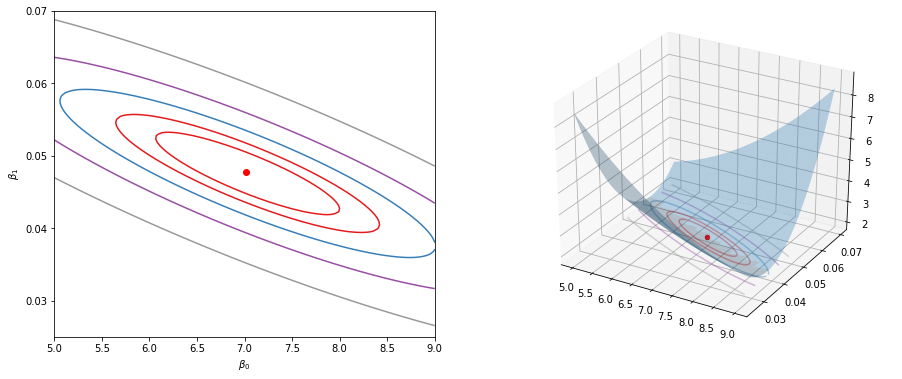

In [59]:
# plot contour and 3d plots of rss
    
beta0 = np.linspace(5, 9, 100)
beta1 = np.linspace(0.025, 0.07, 100)

beta0, beta1 = np.meshgrid(beta0, beta1, indexing='xy')

rss = np.zeros_like(beta0)
for i in range(tv.size):
    rss += (beta0 + beta1 * tv[i] - sales[i]) ** 2 / 1000
    
min_rss = rss.min()
min_arg = np.unravel_index(rss.argmin(), rss.shape)
min_beta0, min_beta1 = beta0[min_arg], beta1[min_arg]
print(f'min rss: {min_rss}')
print(f'min_beta0: {min_beta0}, min_beta1: {min_beta1}')
    
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

ax1.contour(beta0, beta1, rss, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(min_beta0, min_beta1, c='r')
ax1.set_xlabel(r'$\beta_{0}$')
ax1.set_ylabel(r'$\beta_{1}$')

ax2.plot_surface(beta0, beta1, rss, rstride=3, alpha=0.3)
ax2.contour(beta0, beta1, rss, zdir='z', offset=rss.min(), alpha=0.4,
            cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(min_beta0, min_beta1, min_rss, c='r')

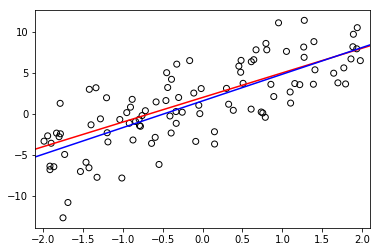

In [70]:
## Assessing the accuracy of the coefficient estimates
size = 100
X = np.random.uniform(-2, 2, (size, 1))
y_acc = 2 + 3 * X
y = y_acc + np.random.normal(0, 3, (size, 1))

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, y)

plt.xlim(-2.1, 2.1)
plt.scatter(X, y, facecolors='none', edgecolor='black')

X = np.linspace(-2.1, 2.1, 100)
y_acc = 2 + 3 * X
y_pred = regr.predict(X[:, np.newaxis])
plt.plot(X, y_acc, c='r')
plt.plot(X, y_pred, c='b')


X.mean() =  0.007149129504719065, X.std() = 1.1810046430196395


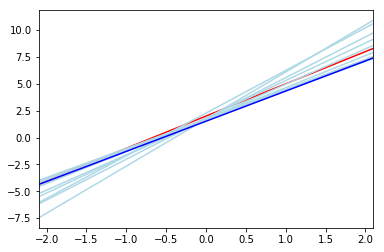

In [92]:
size = 100
X = np.linspace(-2.1, 2.1, 100)
y = 2 + 3 * X

plt.xlim(-2.1, 2.1)
plt.plot(X, y, c='r')

X = np.random.uniform(-2, 2, (size, 1))
y = 2 + 3 * X + np.random.normal(0, 3, (size, 1))

for size in np.arange(10, 101, 10):
    regr.fit(X[:size, :], y[:size])
    X_pred = np.linspace(-2.1, 2.1, 100)
    y_pred = regr.predict(X_pred[:, np.newaxis])
    plt.plot(X_pred, y_pred, c = 'b' if size == 100 else 'lightblue')
    

In [153]:
'''
Y = 2 + 3X + e
suppose that we are interested in knowing
the population mean μ of some random variable Y.

Unfortunately, μ is unknown, but we do have access
to n observations from Y , which we can
write as y1,...,yn, and which we can use to estimate μ.

A reasonable estimate is ˆμ = ¯y, where ¯y is the sample mean.

That sample mean is not population mean, but in general
the sample mean can will provide a good esimate of
the population mean.

It is same to the unknown coefficients β0 and β1 in linear regression.
We seek to estimate these unknown coefficients using βˆ0 and βˆ1 given in (3.4).
'''

sample_size = 100
sample_pre_size = 50

beta0 = np.zeros(sample_size)
beta1 = np.zeros(sample_size)
sample_mean = np.zeros(sample_size)
sample_std = np.zeros(sample_size)
population_mean = np.zeros(sample_size)
for i in range(sample_size):

    X = np.random.uniform(-2, 2, (sample_pre_size, 1))
    y_acc = 2 + 3 * X
    y = y_acc + np.random.normal(0, 3, (sample_pre_size, 1))

    regr.fit(X, y)
    
    beta0[0] = regr.intercept_[0]
    beta1[0] = regr.coef_[0][0]
    sample_mean[i] = y.mean()
    sample_std[i] = y.std()
    population_mean[i] = y_acc.mean()

print(f'mu of sample data: {sample_mean.mean()}, the population mean: {population_mean.mean()}')
print(f'standard error of sample mean: {sample_mean.std()}')
print(f'standard error of beta1 mean: {beta1.std()}')


mu of sample data: 2.0035591466961757, the population mean: 2.004505409389112
standard error of sample mean: 0.6820591390494724
standard error of beta1 mean: 0.2191804201285574


'\nstandard deviation(sd):\nstandard error of mean(sem, se(mean)): \n'